In [1]:
import pandas as pd

In [2]:
file_path = "AusApparalSales4thQrt2020.csv"
df = pd.read_csv(file_path)

In [3]:
df_info = df.info()
df_head = df.head()
df_shape = df.shape
df_columns = df.columns.tolist()

df_info, df_head, df_shape, df_columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


(None,
          Date        Time State     Group  Unit  Sales
 0  1-Oct-2020     Morning    WA      Kids     8  20000
 1  1-Oct-2020     Morning    WA       Men     8  20000
 2  1-Oct-2020     Morning    WA     Women     4  10000
 3  1-Oct-2020     Morning    WA   Seniors    15  37500
 4  1-Oct-2020   Afternoon    WA      Kids     3   7500,
 (7560, 6),
 ['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'])

In [4]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%Y")

In [5]:
# Basic Summary
print(df.describe(include='all'))

                                 Date      Time State  Group         Unit  \
count                            7560      7560  7560   7560  7560.000000   
unique                            NaN         3     7      4          NaN   
top                               NaN   Morning    WA   Kids          NaN   
freq                              NaN      2520  1080   1890          NaN   
mean    2020-11-15 04:00:00.000000256       NaN   NaN    NaN    18.005423   
min               2020-10-01 00:00:00       NaN   NaN    NaN     2.000000   
25%               2020-10-23 00:00:00       NaN   NaN    NaN     8.000000   
50%               2020-11-15 12:00:00       NaN   NaN    NaN    14.000000   
75%               2020-12-08 00:00:00       NaN   NaN    NaN    26.000000   
max               2020-12-30 00:00:00       NaN   NaN    NaN    65.000000   
std                               NaN       NaN   NaN    NaN    12.901403   

                Sales  
count     7560.000000  
unique            NaN  
top

In [6]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [7]:
# Check for duplicates
print("Duplicate Records:", df.duplicated().sum())

Duplicate Records: 0


In [8]:
# Group-wise total sales
sales_by_group = df.groupby("Group")["Sales"].sum().sort_values(ascending=False)
print("Total Sales by Group:\n", sales_by_group)

Total Sales by Group:
 Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64


In [9]:
# State-wise total sales
sales_by_state = df.groupby("State")["Sales"].sum().sort_values(ascending=False)
print("Total Sales by State:\n", sales_by_state)

Total Sales by State:
 State
VIC    105565000
NSW     74970000
SA      58857500
QLD     33417500
TAS     22760000
NT      22580000
WA      22152500
Name: Sales, dtype: int64


In [10]:
# Time-of-day analysis
sales_by_time = df.groupby("Time")["Sales"].sum()
print("Total Sales by Time of Day:\n", sales_by_time)

Total Sales by Time of Day:
 Time
Afternoon    114007500
Evening      112087500
Morning      114207500
Name: Sales, dtype: int64


In [11]:
# Daily sales trend
daily_sales = df.groupby("Date")["Sales"].sum()
print("Daily Sales Summary:\n", daily_sales.head())

Daily Sales Summary:
 Date
2020-10-01    3720000
2020-10-02    3715000
2020-10-03    3890000
2020-10-04    3720000
2020-10-05    3862500
Name: Sales, dtype: int64


In [12]:
# Average units and sales per group
avg_metrics = df.groupby("Group")[["Unit", "Sales"]].mean()
print("Average Units and Sales per Group:\n", avg_metrics)

Average Units and Sales per Group:
               Unit         Sales
Group                           
Kids     18.004762  45011.904762
Men      18.148148  45370.370370
Seniors  17.785714  44464.285714
Women    18.083069  45207.671958


In [13]:
# Correlation matrix
correlation = df[["Unit", "Sales"]].corr()
print("\nCorrelation Matrix:\n", correlation)


Correlation Matrix:
        Unit  Sales
Unit    1.0    1.0
Sales   1.0    1.0


In [14]:
# Standardize categorical text (strip whitespaces, capitalize)
df['Time'] = df['Time'].str.strip().str.capitalize()
df['State'] = df['State'].str.strip().str.upper()
df['Group'] = df['Group'].str.strip().str.capitalize()

In [15]:
# Outlier detection
outliers_unit = df[df["Unit"] > df["Unit"].quantile(0.99)]
outliers_sales = df[df["Sales"] > df["Sales"].quantile(0.99)]

In [16]:
print("Unit Outliers (Top 1%):\n",outliers_unit.head())
print("\nSales Outliers (Top 1%):\n",outliers_sales.head())

Unit Outliers (Top 1%):
            Date       Time State    Group  Unit   Sales
5082 2020-12-01  Afternoon   VIC    Women    63  157500
5083 2020-12-01  Afternoon   VIC  Seniors    62  155000
5162 2020-12-02    Morning   VIC    Women    59  147500
5169 2020-12-02    Evening   VIC      Men    64  160000
5170 2020-12-02    Evening   VIC    Women    63  157500

Sales Outliers (Top 1%):
            Date       Time State    Group  Unit   Sales
5082 2020-12-01  Afternoon   VIC    Women    63  157500
5083 2020-12-01  Afternoon   VIC  Seniors    62  155000
5162 2020-12-02    Morning   VIC    Women    59  147500
5169 2020-12-02    Evening   VIC      Men    64  160000
5170 2020-12-02    Evening   VIC    Women    63  157500


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sns.set(style="whitegrid")

C:\Users\Riya\AppData\Local\Temp\ipykernel_4728\3015448405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_group.index, y=sales_by_group.values, palette="viridis")


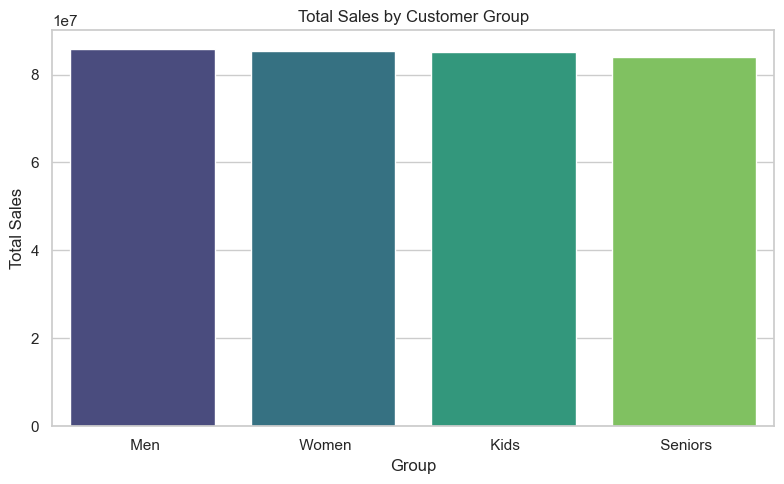

In [19]:
# Total Sales by Group
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_group.index, y=sales_by_group.values, palette="viridis")
plt.title("Total Sales by Customer Group")
plt.ylabel("Total Sales")
plt.xlabel("Group")
plt.tight_layout()
plt.show()

C:\Users\Riya\AppData\Local\Temp\ipykernel_4728\2665485385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_state.index, y=sales_by_state.values, palette="plasma")


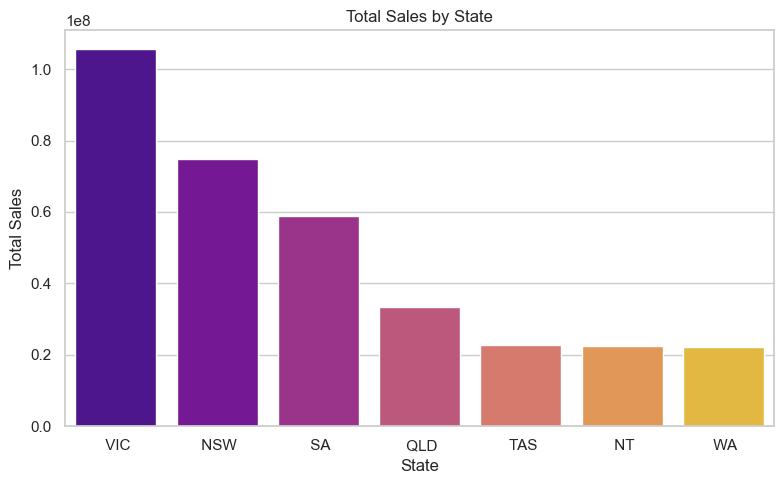

In [20]:
# Total Sales by State
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_state.index, y=sales_by_state.values, palette="plasma")
plt.title("Total Sales by State")
plt.ylabel("Total Sales")
plt.xlabel("State")
plt.tight_layout()
plt.show()

C:\Users\Riya\AppData\Local\Temp\ipykernel_4728\1227661493.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_time.index, y=sales_by_time.values, palette="cubehelix")


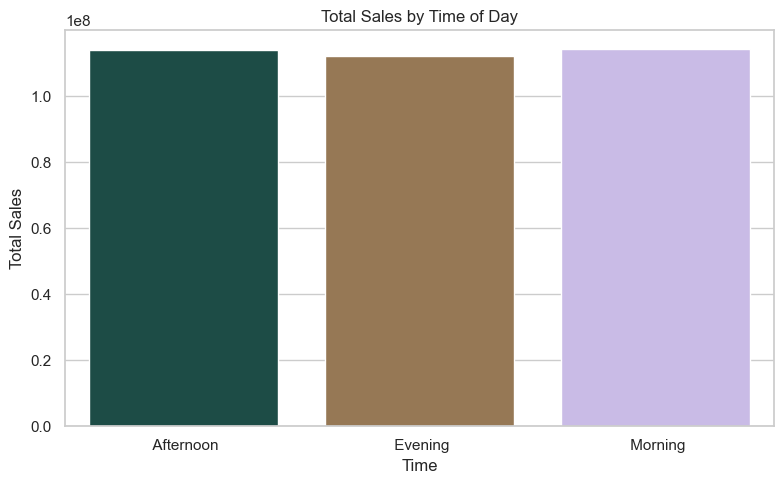

In [21]:
# Total Sales by Time of Day
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_time.index, y=sales_by_time.values, palette="cubehelix")
plt.title("Total Sales by Time of Day")
plt.ylabel("Total Sales")
plt.xlabel("Time")
plt.tight_layout()
plt.show()

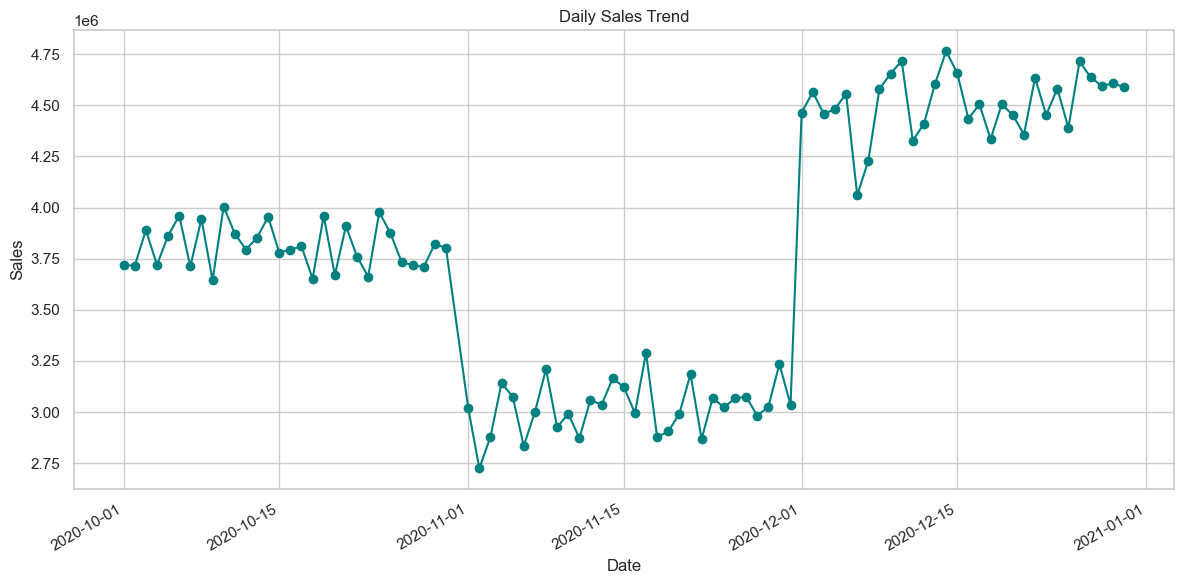

In [22]:
# Line plot of Daily Sales Trend
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', marker='o', linestyle='-', color='teal')
plt.title("Daily Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

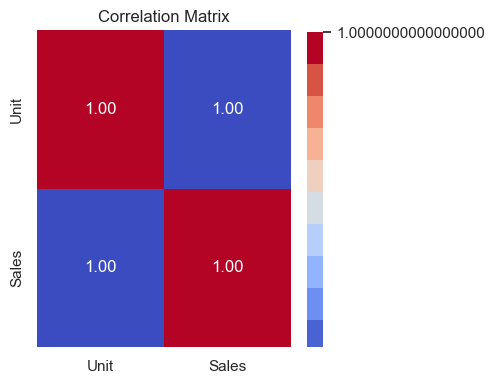

In [23]:
# Heatmap of correlation
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [24]:
!pip install prophet


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from prophet import Prophet

In [26]:
# Prepare data
df_prophet = df.groupby("Date")["Sales"].sum().reset_index()
df_prophet.columns = ["ds", "y"]

In [27]:
# Initialize and fit model
model = Prophet()
model.fit(df_prophet)

13:43:25 - cmdstanpy - INFO - Chain [1] start processing
13:43:26 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
# Create future dataframe for next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

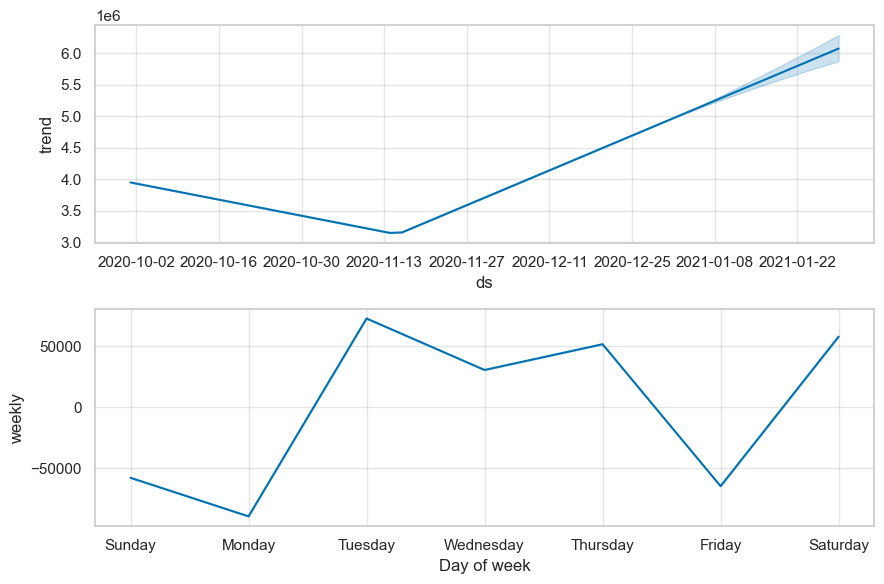

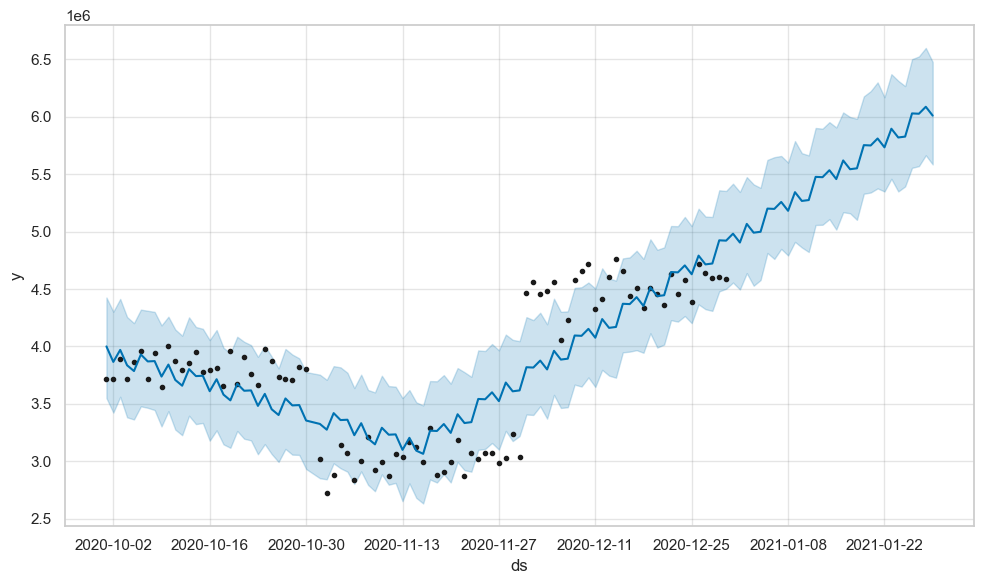

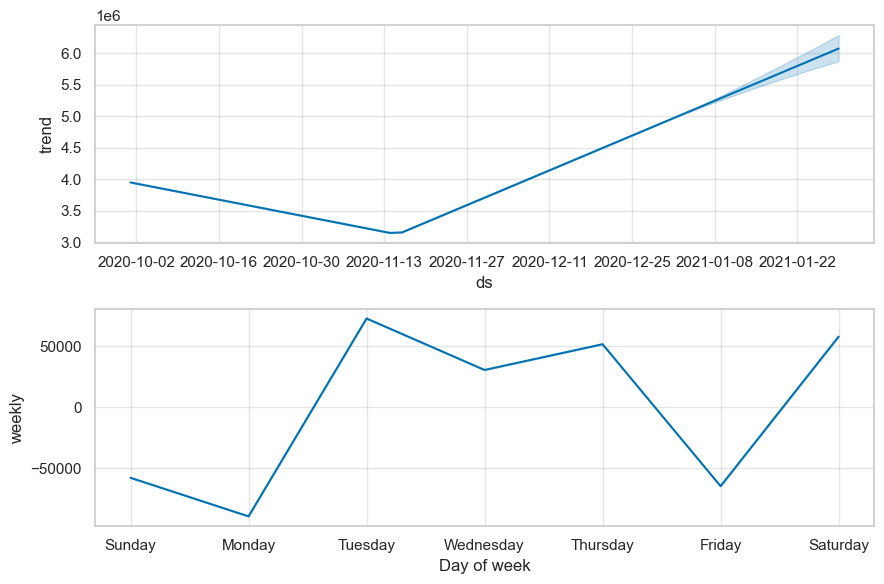

In [29]:
# Plot forecast
model.plot(forecast)
model.plot_components(forecast)

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [31]:
# Select features
features = df[['Unit', 'Sales']]

In [32]:
# Normalize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [33]:
# Find optimal k using Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

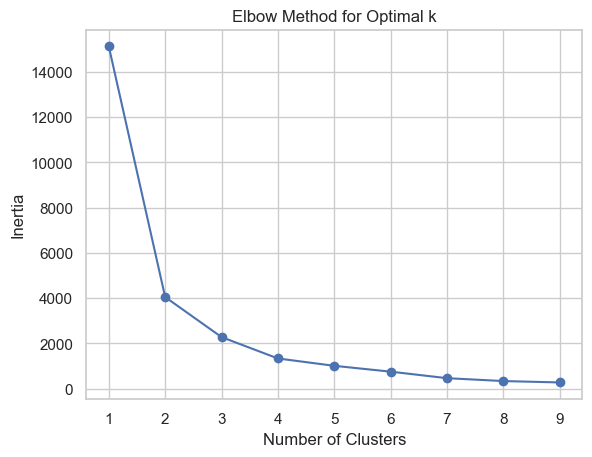

In [34]:
# Plot Elbow Curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [35]:
# Apply KMeans with chosen k (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
print(df.groupby('Cluster')[['Unit', 'Sales']].mean())

              Unit          Sales
Cluster                          
0         6.686170   16715.425532
1        45.118252  112795.629820
2        28.797705   71994.263285
3        14.950130   37375.325239
